## 1. Data Preprocessing

In [1]:
#importing required libraries
import pandas as pd
import missingno as msno 
import numpy as np
import imblearn
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn import metrics 
from sklearn.metrics import roc_curve

In [2]:
#read the data
data= pd.read_csv("D:/7150CEM/Data/FinalData/FirstYear.csv")
#Dropping target feature
data1 = data.drop('class',axis=1)
y = data['class']
#data visualization
data1.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,348690.0,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,2304.6,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,6332.7,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,20545.0,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,3186.6,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980


In [3]:
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027 entries, 0 to 7026
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   7024 non-null   float64
 1   Attr2   7024 non-null   float64
 2   Attr3   7024 non-null   float64
 3   Attr4   6997 non-null   float64
 4   Attr5   7019 non-null   float64
 5   Attr6   7024 non-null   float64
 6   Attr7   7024 non-null   float64
 7   Attr8   7002 non-null   float64
 8   Attr9   7026 non-null   float64
 9   Attr10  7024 non-null   float64
 10  Attr11  6988 non-null   float64
 11  Attr12  6997 non-null   float64
 12  Attr13  7027 non-null   float64
 13  Attr14  7024 non-null   float64
 14  Attr15  7025 non-null   float64
 15  Attr16  7002 non-null   float64
 16  Attr17  7002 non-null   float64
 17  Attr18  7024 non-null   float64
 18  Attr19  7027 non-null   float64
 19  Attr20  7027 non-null   float64
 20  Attr21  5405 non-null   float64
 21  Attr22  7024 non-null   float64
 22  

In [4]:
#looking for null values
data1.isnull().sum()

Attr1       3
Attr2       3
Attr3       3
Attr4      30
Attr5       8
         ... 
Attr60    135
Attr61     22
Attr62      0
Attr63     30
Attr64     34
Length: 64, dtype: int64

<Axes: >

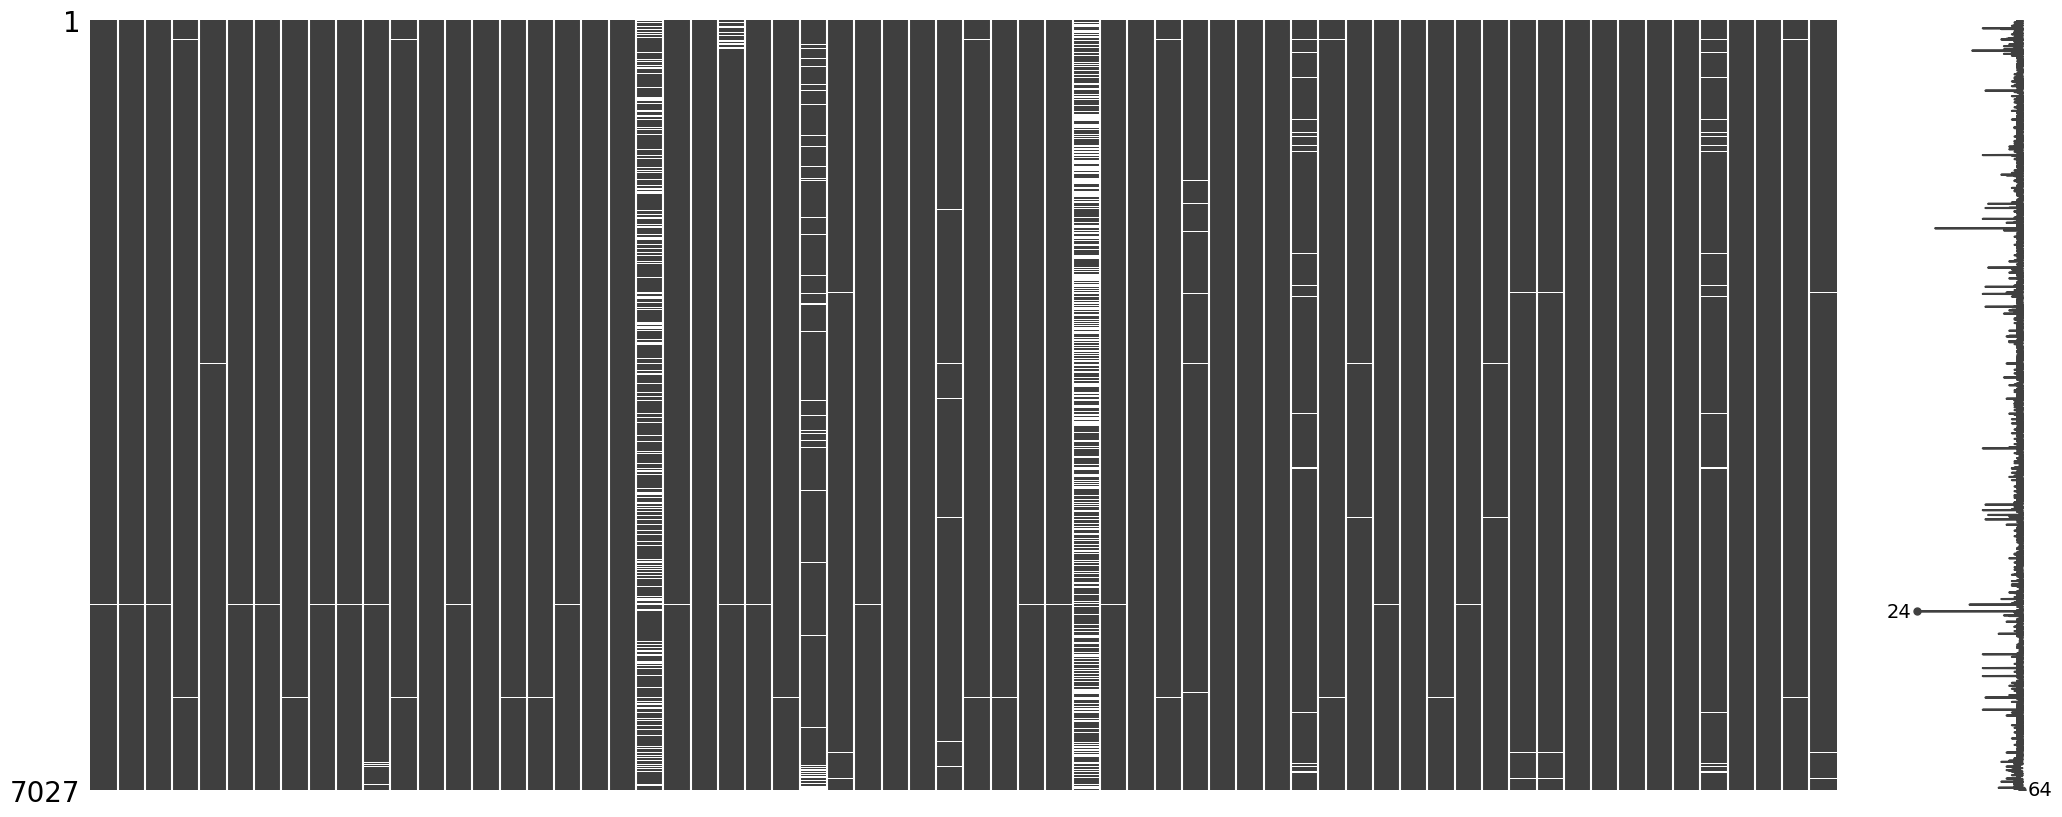

In [5]:
#Matrix for the Missing values
msno.matrix(data1)

In [6]:
#drop the null values
data_1st=data1.dropna()

In [7]:
#calculate data loss percentage
per_1st = ((len(data1)-len(data_1st))/len(data1))*100
print("percentage of data loss after removing the null values: ", per_1st)

percentage of data loss after removing the null values:  54.546748256724065


## 2. Data Imputation
### 2.1 KNN Imputation

In [8]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
df_filled = imputer.fit_transform(data1)

In [9]:
# Final Data 
data1 = pd.DataFrame(df_filled)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027 entries, 0 to 7026
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       7027 non-null   float64
 1   1       7027 non-null   float64
 2   2       7027 non-null   float64
 3   3       7027 non-null   float64
 4   4       7027 non-null   float64
 5   5       7027 non-null   float64
 6   6       7027 non-null   float64
 7   7       7027 non-null   float64
 8   8       7027 non-null   float64
 9   9       7027 non-null   float64
 10  10      7027 non-null   float64
 11  11      7027 non-null   float64
 12  12      7027 non-null   float64
 13  13      7027 non-null   float64
 14  14      7027 non-null   float64
 15  15      7027 non-null   float64
 16  16      7027 non-null   float64
 17  17      7027 non-null   float64
 18  18      7027 non-null   float64
 19  19      7027 non-null   float64
 20  20      7027 non-null   float64
 21  21      7027 non-null   float64
 22  

In [10]:
#rename column values
data1.columns=['ROA', 'TDTA', 'WCTA','CAAL','DIR','REL','EBIT','BV','ATR','ETA','GPEIFE','GPL','GPDS','GPI','LGPD','GPDL','TATL','GPA','Revenue','ITS','NS','OCFTA','NPS','GPA_3','ESTA','SR','POATFE','WCFA','FS','TLCS','GPIS','CLTCOGS','OPSL','OPTL','PSTA','ATR','CAIL','CCTA','PSS','CAIRSL','TLOAD','POAS','RRIT','RS','PI','CAISL','ICOGS','POADTA_EBITDA','POADS_EBITDA','CR','SLTA','SLCOGS','EFAR','CCFA','WC','SCOGSS','CAISL_SGPD','CSR','LLE','SI','STR','SLS','SSL','SFA']
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027 entries, 0 to 7026
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ROA            7027 non-null   float64
 1   TDTA           7027 non-null   float64
 2   WCTA           7027 non-null   float64
 3   CAAL           7027 non-null   float64
 4   DIR            7027 non-null   float64
 5   REL            7027 non-null   float64
 6   EBIT           7027 non-null   float64
 7   BV             7027 non-null   float64
 8   ATR            7027 non-null   float64
 9   ETA            7027 non-null   float64
 10  GPEIFE         7027 non-null   float64
 11  GPL            7027 non-null   float64
 12  GPDS           7027 non-null   float64
 13  GPI            7027 non-null   float64
 14  LGPD           7027 non-null   float64
 15  GPDL           7027 non-null   float64
 16  TATL           7027 non-null   float64
 17  GPA            7027 non-null   float64
 18  Revenue 

## 3. Data Standardization

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Splitting the data into 80-20 ratio
X_train,X_test,y_train,y_test= train_test_split(data1,y,test_size=0.2,random_state = 42)

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 4. Data Balance

In [12]:
# target feature 'class' Count
class_0 = data[data['class'] == 0]
class_1 = data[data['class'] == 1]
#print the shape of the class variable
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (6756, 65)
class 1: (271, 65)


### 4.1 SMOTE Over-Sampling technique

In [13]:
# import library
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')

# fit predictor and target variable
X_train, y_train = smote.fit_resample(X_train,y_train)

## 5. Feature Selection
### 5.1 PCA Analysis

variance expalined: [3.52952983e-01 2.12792756e-01 1.20851190e-01 1.02719950e-01
 4.86576868e-02 3.39263142e-02 2.71538483e-02 1.89052620e-02
 1.75612053e-02 1.75060041e-02 1.31105566e-02 1.26814076e-02
 6.73540147e-03 5.52023957e-03 3.26768370e-03 1.97211959e-03
 1.23230058e-03 7.50356033e-04 6.05118725e-04 3.12770150e-04
 1.47189617e-04 1.24908904e-04 9.94034658e-05 8.53929035e-05
 6.23970416e-05 4.74373875e-05 4.40948097e-05 3.36566946e-05
 2.97261561e-05 1.99732599e-05 1.64881029e-05 1.46955233e-05
 1.24007052e-05 1.09543895e-05 9.74126216e-06 5.64152661e-06
 4.30360934e-06 4.11192802e-06 3.81206785e-06 1.88234685e-06
 1.65786973e-06 1.30628791e-06 1.04825628e-06 8.22671944e-07
 4.95150692e-07 4.39761737e-07 3.58770176e-07 3.32492827e-07
 8.06994561e-08 4.11385868e-08 1.94269438e-08 1.35269183e-08
 6.22782416e-09 4.51083351e-09 3.34029866e-09 2.59107396e-09
 1.12051908e-09 1.77556455e-10 2.51769805e-11 8.79482165e-13
 1.06255565e-13 7.53756807e-19 1.68616943e-33 1.68616943e-33]
var

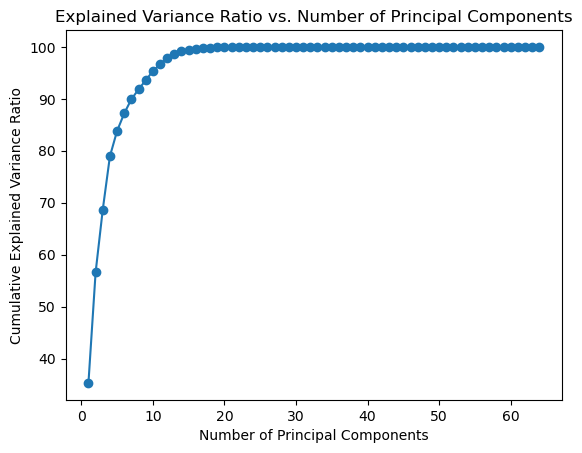

In [14]:
from sklearn.decomposition import PCA
# PCA Analysis for all components of train data
pca = PCA(n_components=64)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
explained_var_ratio = pca.explained_variance_ratio_
print("variance expalined:",explained_var_ratio)
cumulative_var_ratio = np.cumsum(np.round(explained_var_ratio,decimals=4)*100)
print("variance :", cumulative_var_ratio)

plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.show()

variance expalined: [3.52952983e-01 2.12792756e-01 1.20851190e-01 1.02719950e-01
 4.86576868e-02 3.39263142e-02 2.71538483e-02 1.89052620e-02
 1.75612053e-02 1.75060041e-02 1.31105566e-02 1.26814076e-02
 6.73540147e-03 5.52023957e-03 3.26768370e-03 1.97211959e-03
 1.23230058e-03 7.50356033e-04 6.05118725e-04 3.12770150e-04]
variance : [35.3  56.58 68.67 78.94 83.81 87.2  89.92 91.81 93.57 95.32 96.63 97.9
 98.57 99.12 99.45 99.65 99.77 99.85 99.91 99.94]


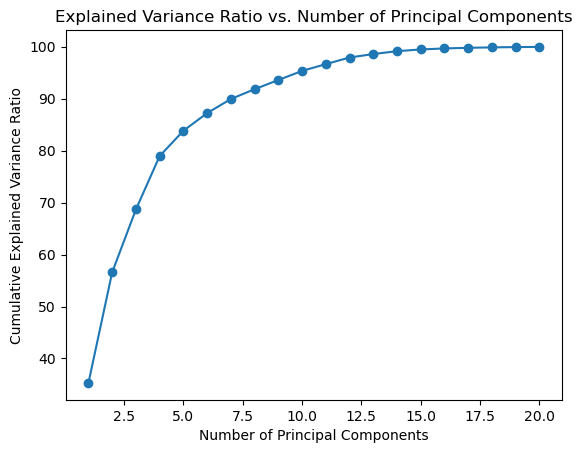

In [15]:
from sklearn.decomposition import PCA
# PCA Analysis with 15 components of train data
pca = PCA(n_components=20)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
explained_var_ratio = pca.explained_variance_ratio_
print("variance expalined:",explained_var_ratio)
cumulative_var_ratio = np.cumsum(np.round(explained_var_ratio,decimals=4)*100)
print("variance :", cumulative_var_ratio)

plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.show()


## 6. Machine Learning techniques
### 6.1 Logistic regression

In [16]:
import sklearn.linear_model as lm 
from sklearn.linear_model import LogisticRegression
#logistic Regression
LR=lm.LogisticRegression(max_iter = 300) 
LR.fit(X_train,y_train) 
LR_pred= LR.predict(X_test) 
#train and test accuracy scores
trACC_LR=LR.score(X_train,y_train) 
tesACC_LR=LR.score(X_test,y_test) 
print('Train Accuracy for Logistic Regression : ',trACC_LR) 
print('Test Accuracy for Logistic Regression : ', tesACC_LR,"\n") #30.08


Train Accuracy for Logistic Regression :  0.6658952045917422
Test Accuracy for Logistic Regression :  0.3008534850640114 



In [17]:
#Confusion matrix
LR_cf = confusion_matrix(y_test,LR_pred) 
print('confusion matrix for LR:\n',LR_cf)

#printingcclassification report of Confusion matrix 
LR_matrix = classification_report(y_test,LR_pred) 
print('Classification Report for LR:\n',LR_matrix) 

confusion matrix for LR:
 [[382 973]
 [ 10  41]]
Classification Report for LR:
               precision    recall  f1-score   support

           0       0.97      0.28      0.44      1355
           1       0.04      0.80      0.08        51

    accuracy                           0.30      1406
   macro avg       0.51      0.54      0.26      1406
weighted avg       0.94      0.30      0.42      1406



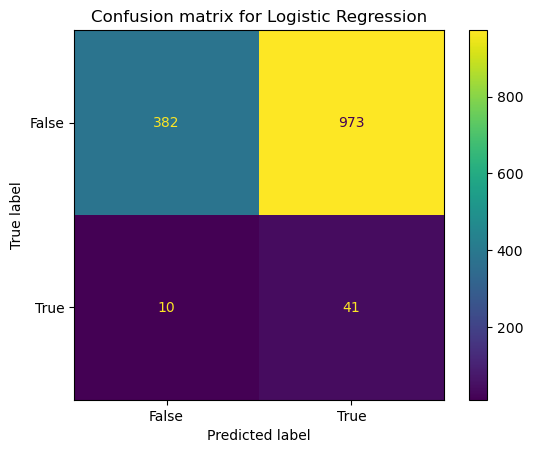

In [18]:
#plotting Confusion matrix  
LR_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = LR_cf,display_labels = [False,True]) 
LR_cm_display.plot() 
plt.title('Confusion matrix for Logistic Regression') 
plt.show()

### 6.2 Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
#Decision tree classifier
DT= DecisionTreeClassifier()
DT.fit(X_train, y_train) 
DT_pred = DT.predict(X_test)
#train and test accuracies
trACC_DT=DT.score(X_train,y_train) 
tesACC_DT=DT.score(X_test,y_test) 
print('Train Accuracy for Decision Tree  : ',trACC_DT) 
print('Test Accuracy for Decision Tree : ', tesACC_DT,"\n") #85.63

Train Accuracy for Decision Tree  :  1.0
Test Accuracy for Decision Tree :  0.8563300142247511 



In [20]:
#Confusion Matrix
DT_cf = confusion_matrix(y_test,DT_pred) 
print('confusion matrix for DT:\n',DT_cf) 

#Classification report of Confusion matrix 
DT_matrix = classification_report(y_test,DT_pred) 
print('Classification Report for DT:\n',DT_matrix) 


confusion matrix for DT:
 [[1200  155]
 [  47    4]]
Classification Report for DT:
               precision    recall  f1-score   support

           0       0.96      0.89      0.92      1355
           1       0.03      0.08      0.04        51

    accuracy                           0.86      1406
   macro avg       0.49      0.48      0.48      1406
weighted avg       0.93      0.86      0.89      1406



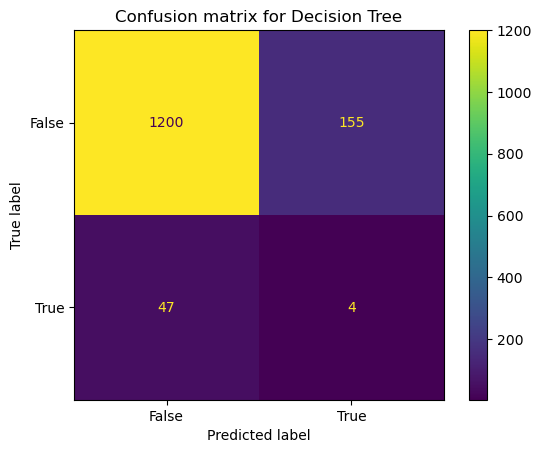

In [21]:
#plotting Confusion matrix  
DT_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = DT_cf,display_labels = [False,True]) 
DT_cm_display.plot() 
plt.title('Confusion matrix for Decision Tree') 
plt.show()

### 6.3 Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
#Random Forest
RF= RandomForestClassifier(n_estimators=100)
RF.fit(X_train, y_train) 
RF_pred = RF.predict(X_test)
#train and test accuracies
trACC_RF=RF.score(X_train,y_train) 
tesACC_RF=RF.score(X_test,y_test) 
print('Train Accuracy for Random Forest  : ',trACC_RF) 
print('Test Accuracy for Random Forest : ', tesACC_RF,"\n") #96.23


Train Accuracy for Random Forest  :  1.0
Test Accuracy for Random Forest :  0.9623044096728307 



In [23]:
#Confusion Matrix
RF_cf = confusion_matrix(y_test,RF_pred) 
print('confusion matrix for RF:\n',RF_cf) 

#Classification report of confusion matrix 
RF_matrix = classification_report(y_test,RF_pred) 
print('Classification Report for RF:\n',RF_matrix) 

confusion matrix for RF:
 [[1353    2]
 [  51    0]]
Classification Report for RF:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1355
           1       0.00      0.00      0.00        51

    accuracy                           0.96      1406
   macro avg       0.48      0.50      0.49      1406
weighted avg       0.93      0.96      0.95      1406



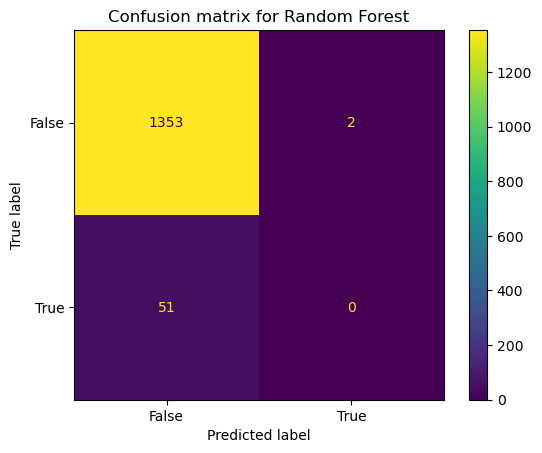

In [24]:
#plotting Confusion matrix  
RF_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = RF_cf,display_labels = [False,True]) 
RF_cm_display.plot() 
plt.title('Confusion matrix for Random Forest') 
plt.show()

### 6.4 Gradient Boosting Classifier

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
#Gradient Boosting Classifier
GB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
GB.fit(X_train, y_train)
GB_pred = GB.predict(X_test)
#train and test accuracies
trACC_GB=GB.score(X_train,y_train) 
tesACC_GB=GB.score(X_test,y_test) 
print('Train Accuracy for Gradient Boost  : ',trACC_GB) 
print('Test Accuracy for Gradient Boost : ', tesACC_GB,"\n") # 40.04


Train Accuracy for Gradient Boost  :  0.7807813367894835
Test Accuracy for Gradient Boost :  0.40042674253200566 



In [26]:
#Confusion Matrix
GB_cf = confusion_matrix(y_test,GB_pred) 
print('confusion matrix for GB:\n',GB_cf) 

#Classification report of Confusion matrix
GB_matrix = classification_report(y_test,GB_pred) 
print('Classification Report for GB:\n',GB_matrix)


confusion matrix for GB:
 [[532 823]
 [ 20  31]]
Classification Report for GB:
               precision    recall  f1-score   support

           0       0.96      0.39      0.56      1355
           1       0.04      0.61      0.07        51

    accuracy                           0.40      1406
   macro avg       0.50      0.50      0.31      1406
weighted avg       0.93      0.40      0.54      1406



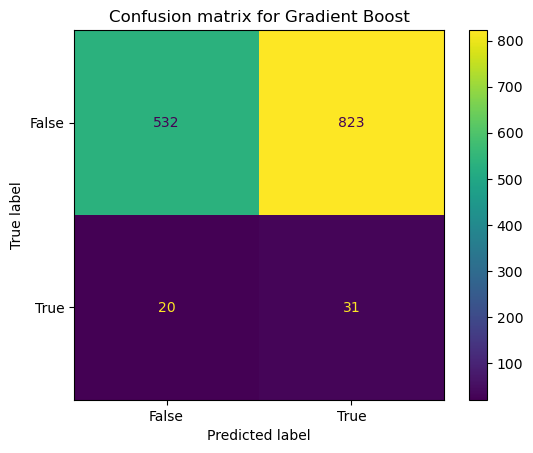

In [27]:
#plotting Confusion matrix  
GB_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = GB_cf,display_labels = [False,True]) 
GB_cm_display.plot() 
plt.title('Confusion matrix for Gradient Boost') 
plt.show()

### 6.5 Extreme Gradient Boosting Classifier (XGBoosting)

In [28]:
import xgboost as xgb
# Train a XGB model using the scikit-learn API
XGB = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.1, max_depth=3, enable_categorical=True)
XGB.fit(X_train, y_train)
XGB_pred = XGB.predict(X_test)
#train and test Accuracies
trACC_XGB=XGB.score(X_train,y_train) 
tesACC_XGB=XGB.score(X_test,y_test) 
print('Train Accuracy for Xtreme Gradient Boost  : ',trACC_XGB) 
print('Test Accuracy for Xtreme Gradient Boost : ', tesACC_XGB,"\n") #75.60

Train Accuracy for Xtreme Gradient Boost  :  0.8104980559155712
Test Accuracy for Xtreme Gradient Boost :  0.7560455192034139 



In [29]:
#Confusion Matrix
XGB_cf = confusion_matrix(y_test,XGB_pred) 
print('confusion matrix for XGB:\n',XGB_cf) 

#Classification report of Confusion matrix 
XGB_matrix = classification_report(y_test,XGB_pred) 
print('Classification Report for XGB:\n',XGB_matrix) 


confusion matrix for XGB:
 [[1048  307]
 [  36   15]]
Classification Report for XGB:
               precision    recall  f1-score   support

           0       0.97      0.77      0.86      1355
           1       0.05      0.29      0.08        51

    accuracy                           0.76      1406
   macro avg       0.51      0.53      0.47      1406
weighted avg       0.93      0.76      0.83      1406



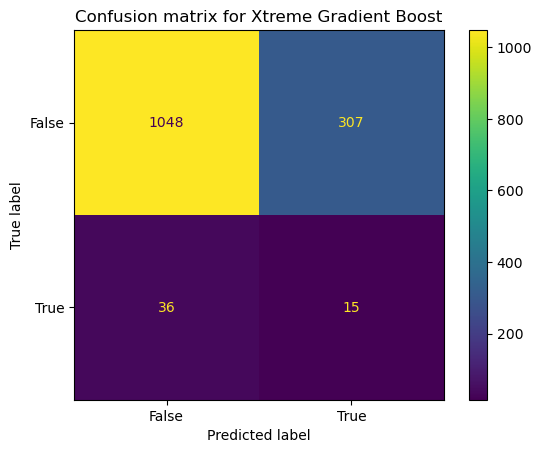

In [30]:
#plotting Confusion matrix  
XGB_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = XGB_cf,display_labels = [False,True]) 
XGB_cm_display.plot() 
plt.title('Confusion matrix for Xtreme Gradient Boost') 
plt.show()

### 6.6 Support Vector Machine

In [31]:
from sklearn.svm import SVC
#Support Vector Machine
svc = SVC(probability=True)
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
#train and test Accuracies
trACC_svc=svc.score(X_train,y_train) 
tesACC_svc=svc.score(X_test,y_test) 
print('Train Accuracy for SVM  : ',trACC_svc) 
print('Test Accuracy for SVM : ', tesACC_svc,"\n") #45.87


Train Accuracy for SVM  :  0.6589520459174227
Test Accuracy for SVM :  0.45874822190611664 



In [32]:
#Confusion Matrix
svc_cf = confusion_matrix(y_test,svc_pred) 
print('confusion matrix for SVM:\n',svc_cf) 

#Classification report of Confusion matrix metrics 
svc_matrix = classification_report(y_test,svc_pred) 
print('Classification Report for SVM:\n',svc_matrix) 

confusion matrix for SVM:
 [[612 743]
 [ 18  33]]
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.97      0.45      0.62      1355
           1       0.04      0.65      0.08        51

    accuracy                           0.46      1406
   macro avg       0.51      0.55      0.35      1406
weighted avg       0.94      0.46      0.60      1406



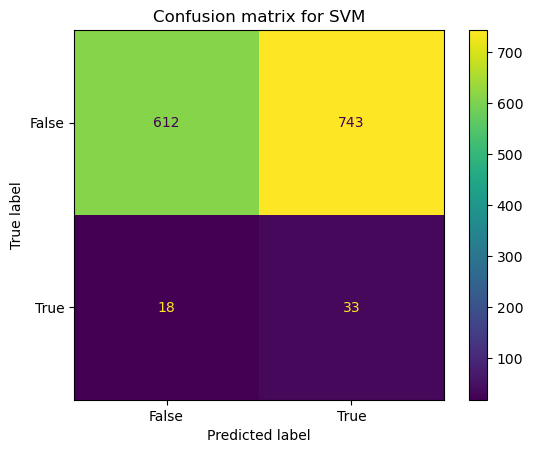

In [33]:
#plotting Confusion matrix  
svc_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = svc_cf,display_labels = [False,True]) 
svc_cm_display.plot() 
plt.title('Confusion matrix for SVM') 
plt.show()

## 7. ROC Curve

In [34]:
# ROC curve for Decision Tree 
DT_pred_prob = DT.predict_proba(X_test) 
DT_pred_prob = DT_pred_prob[:,1] 
DT_fpr,DT_tpr,_=roc_curve(y_test,DT_pred_prob) 

# ROC for Logistic regression 
LR_pred_prob = LR.predict_proba(X_test) 
LR_pred_prob = LR_pred_prob[:,1] 
LR_fpr,LR_tpr,_=roc_curve(y_test,LR_pred_prob) 

#ROC for Random Forest
RF_pred_prob = RF.predict_proba(X_test)
RF_pred_prob = RF_pred_prob[:,1]
RF_fpr,RF_tpr,_=roc_curve(y_test,RF_pred_prob)

#ROC curve for GB
GB_pred_prob = GB.predict_proba(X_test)
GB_pred_prob = GB_pred_prob[:,1]
GB_fpr,GB_tpr,_=roc_curve(y_test,GB_pred_prob)

#ROC curve for XGB
XGB_pred_prob = XGB.predict_proba(X_test)
XGB_pred_prob = XGB_pred_prob[:,1]
XGB_fpr,XGB_tpr,_=roc_curve(y_test,XGB_pred_prob)

#ROC curve for SVC
svc_pred_prob = svc.predict_proba(X_test)
svc_pred_prob = svc_pred_prob[:,1]
svc_fpr,svc_tpr,_=roc_curve(y_test,svc_pred_prob)

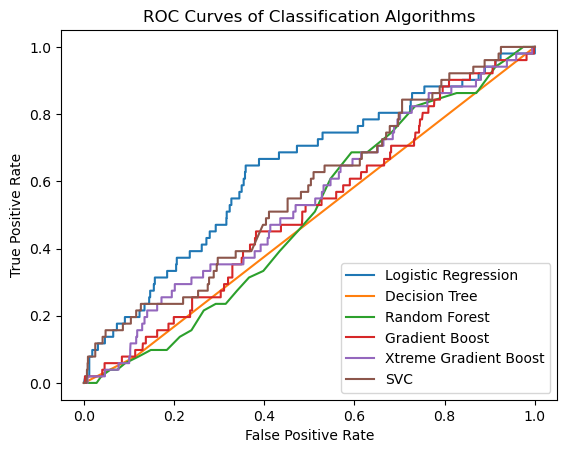

In [35]:
#plotting Roc_curve 
plt.figure() 
plt.plot(LR_fpr,LR_tpr,label = 'Logistic Regression') 
plt.plot(DT_fpr,DT_tpr,label = 'Decision Tree') 
plt.plot(RF_fpr,RF_tpr,label = 'Random Forest')
plt.plot(GB_fpr,GB_tpr,label = 'Gradient Boost')
plt.plot(XGB_fpr,XGB_tpr,label = 'Xtreme Gradient Boost')
plt.plot(svc_fpr,svc_tpr,label='SVC')
plt.title('ROC Curves of Classification Algorithms') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend() 
plt.show()

## 8. Accuracies of Machine Learning Algorithms

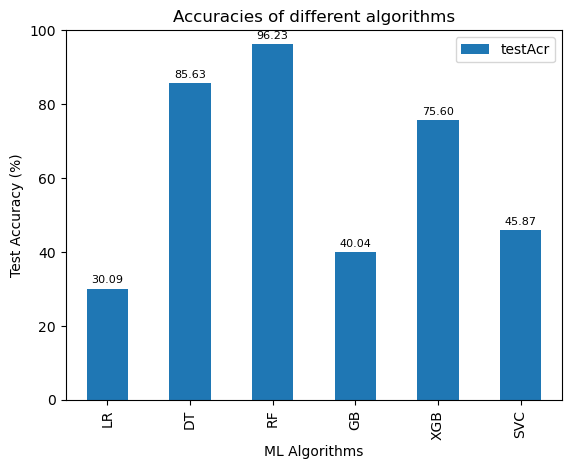

In [36]:
#Accuracy plot of Different Machine Learning methods 
dt = [['LR',trACC_LR*100,tesACC_LR*100],['DT',trACC_DT*100,tesACC_DT*100],['RF',trACC_RF*100,tesACC_RF*100],['GB',trACC_GB*100,tesACC_GB*100],['XGB',trACC_XGB*100,tesACC_XGB*100],['SVC',trACC_svc*100,tesACC_svc*100]] 
df = pd.DataFrame(dt, columns=['Name','trainAcr','testAcr']) 
plots = df.plot.bar(x='Name',y = 'testAcr',width = 0.5) 
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 6),
                   textcoords='offset points')
plt.title('Accuracies of different algorithms') 
plt.xlabel('ML Algorithms') 
plt.ylabel('Test Accuracy (%)') 
plt.ylim(0,100)
plt.show()